In [14]:
import numpy as np

In [15]:
# /home/kunal/Desktop/Sem_9/DDP/Maxcut/phi_history_exponential_dsjc125.5.npy    
graph_name = 'dsjc125.5'
file_path_exponential = '/home/kunal/Desktop/Sem_9/DDP/Maxcut/phi_history_exponential_' + graph_name + '.npy'
file_path_gaussian = '/home/kunal/Desktop/Sem_9/DDP/Maxcut/phi_history_gaussian_' + graph_name + '.npy'

phi_history_exponential = np.load(file_path_exponential)
phi_history_gaussian = np.load(file_path_gaussian)

# Print the shapes of the loaded arrays
print("Shape of phi_history_exponential:", phi_history_exponential.shape)
print("Shape of phi_history_gaussian:", phi_history_gaussian.shape)

Shape of phi_history_exponential: (1945, 125)
Shape of phi_history_gaussian: (1929, 125)


In [16]:
min_num_iterations = min(phi_history_exponential.shape[0], phi_history_gaussian.shape[0])
# Ensure both arrays have the same number of iterations
phi_history_exponential = phi_history_exponential[:min_num_iterations]
phi_history_gaussian = phi_history_gaussian[:min_num_iterations]

In [17]:
settling_time = 500  # Define the settling time
phi_history_exponential = phi_history_exponential[settling_time:]
phi_history_gaussian = phi_history_gaussian[settling_time:]

In [18]:
def get_num_crossings(phi_history):
    num_crossings = 0
    num_iters = phi_history.shape[0]
    num_nodes = phi_history.shape[1]
    cumulative_num_crossings = np.zeros(num_iters)
    pi_boundry_crossing_threshold = np.pi
    for i in range(1, num_iters):
        for node1 in range(num_nodes):
            for node2 in range(node1 + 1, num_nodes):
                # If none or both nodes move across -pi and pi
                condition1 = np.abs(phi_history[i, node1] - phi_history[i-1, node1]) > pi_boundry_crossing_threshold
                condition2 = np.abs(phi_history[i, node2] - phi_history[i-1, node2]) > pi_boundry_crossing_threshold
                if (condition1 and condition2) or (not condition1 and not condition2):
                    if((phi_history[i, node1] - phi_history[i,node2])*
                       (phi_history[i-1, node1] - phi_history[i-1,node2]) < 0):
                        num_crossings += 1
                else:
                    if((phi_history[i, node1] - phi_history[i,node2])*
                       (phi_history[i-1, node1] - phi_history[i-1,node2]) > 0):
                        num_crossings += 1
        cumulative_num_crossings[i] = num_crossings
    return cumulative_num_crossings


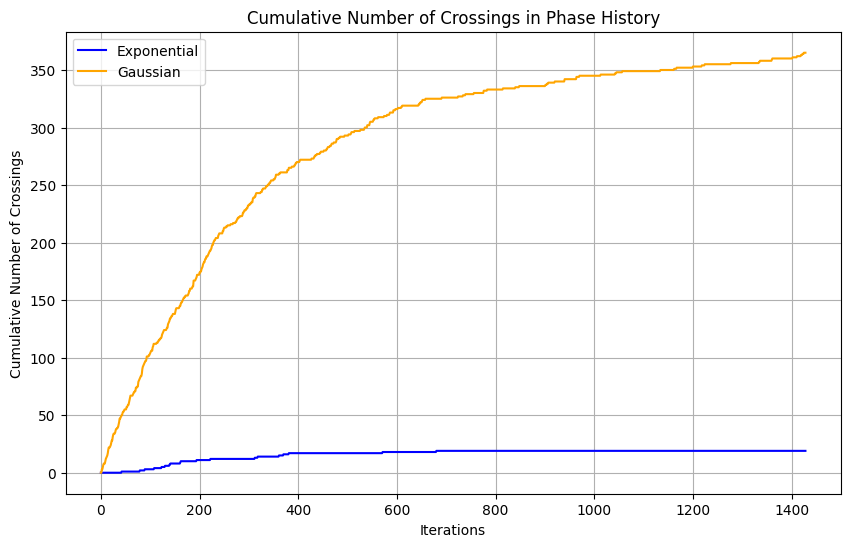

<Figure size 640x480 with 0 Axes>

In [19]:
cumulative_num_crossings_exponential = get_num_crossings(phi_history_exponential)
cumulative_num_crossings_gaussian = get_num_crossings(phi_history_gaussian)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(cumulative_num_crossings_exponential, label='Exponential', color='blue')
plt.plot(cumulative_num_crossings_gaussian, label='Gaussian', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Number of Crossings')
plt.title('Cumulative Number of Crossings in Phase History')
plt.legend()
plt.grid()
plt.show()
# Save the plot
plt.savefig('/home/kunal/Desktop/Sem_9/DDP/Maxcut/cumulative_crossings_' + graph_name + '.png')

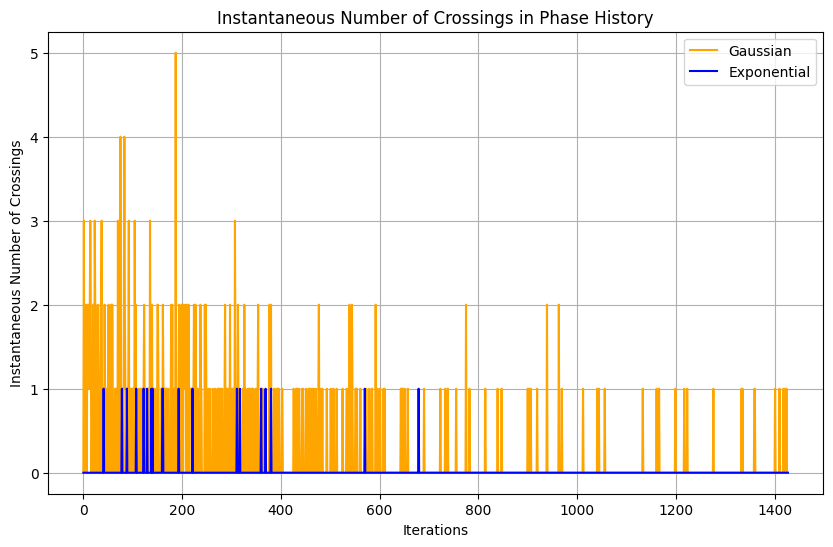

<Figure size 640x480 with 0 Axes>

In [20]:
# instantenouts = cumulative_num_crossings_exponential[1:] - cumulative_num_crossings_exponential[:-1]
instantenous_num_crossings_exponential = cumulative_num_crossings_exponential[1:] - cumulative_num_crossings_exponential[:-1]
instantenous_num_crossings_gaussian = cumulative_num_crossings_gaussian[1:] - cumulative_num_crossings_gaussian[:-1]
plt.figure(figsize=(10, 6))
plt.plot(instantenous_num_crossings_gaussian, label='Gaussian', color='orange')
plt.plot(instantenous_num_crossings_exponential, label='Exponential', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Instantaneous Number of Crossings')
plt.title('Instantaneous Number of Crossings in Phase History')
plt.legend()
plt.grid()
plt.show()
# Save the plot
plt.savefig('/home/kunal/Desktop/Sem_9/DDP/Maxcut/instantaneous_crossings_' + graph_name + '.png')

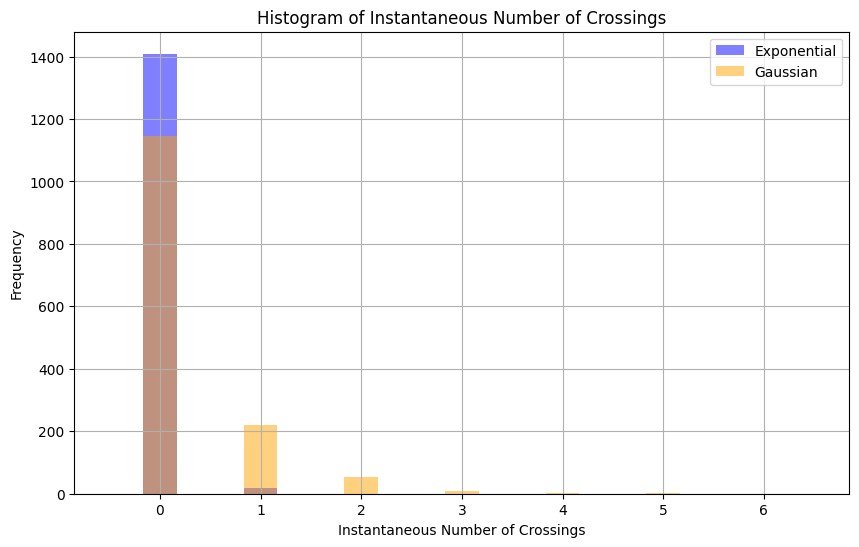

In [21]:
# Plot histogram of instantaneous crossings
plt.figure(figsize=(10, 6))
plt.hist(instantenous_num_crossings_exponential, bins=21, alpha=0.5, label='Exponential', color='blue', range=(-0.5, 6.5))
plt.hist(instantenous_num_crossings_gaussian, bins=21, alpha=0.5, label='Gaussian', color='orange', range=(-0.5, 6.5))
plt.xlabel('Instantaneous Number of Crossings')
plt.ylabel('Frequency')
plt.title('Histogram of Instantaneous Number of Crossings')
plt.legend()
plt.grid()
plt.show()

In [22]:
# Print histogram data
print("Histogram Data for Exponential:")
hist_exponential, bin_edges_exponential = np.histogram(instantenous_num_crossings_exponential, range = (0,10), bins = 10)
print("Bin Edges (Exponential):", bin_edges_exponential)
print("Histogram Counts (Exponential):", hist_exponential)
print("Histogram Data for Gaussian:")
hist_gaussian, bin_edges_gaussian = np.histogram(instantenous_num_crossings_gaussian, range = (0,10), bins = 10)
print("Bin Edges (Gaussian):", bin_edges_gaussian)
print("Histogram Counts (Gaussian):", hist_gaussian)
# Save histogram data to files

Histogram Data for Exponential:
Bin Edges (Exponential): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Histogram Counts (Exponential): [1409   19    0    0    0    0    0    0    0    0]
Histogram Data for Gaussian:
Bin Edges (Gaussian): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Histogram Counts (Gaussian): [1144  219   53    9    2    1    0    0    0    0]
